In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import geopandas as gpd

In [2]:
os.chdir("/Users/amirreza/Desktop")
df=pd.read_csv("data2.csv")

In [3]:
os.chdir("/Users/amirreza/Desktop/Neighborhoods_2012")
bounds= gpd.read_file("Neighborhoods_2012b.shp")

In [4]:
df["Canopy"]=df["Canopy"]*0.01

In [5]:
df.head()

,Neighborhood,Total Area,Redlined Area,Redlined,Yellowlined Area,Yellowlined,Bluelined Area,Bluelined,Greenlined Area,Greenlined,% Unlined,Score',Park Area,Park,Canopy,% Canopy
0,Albany Park,4.974188e+06,0.00,0.00,400667842.00%,0.81,60590845.80%,0.12,0.00%,0.00,7.27%,0.33,115325.44000,0.02,0.2413,24.13%
1,Andersonville,8.904190e+05,0.00,0.00,89041897.20%,1.00,0.00%,0.00,0.00%,0.00,0.00%,0.25,3455.54852,0.00,0.2447,24.47%
2,Archer Heights,5.195324e+06,534253.00,0.10,147897732.00%,0.28,0.00%,0.00,0.00%,0.00,61.25%,0.68,97412.68990,0.02,0.0760,7.60%
3,Armour Square,1.592448e+06,1083609.51,0.68,0.00%,0.00,0.00%,0.00,0.00%,0.00,31.95%,0.32,46586.33220,0.03,0.0872,8.72%
4,Ashburn,1.258451e+07,7298099.42,0.58,0.00%,0.00,0.00%,0.00,6759050.21%,0.01,41.47%,0.42,252245.15800,0.02,0.1633,16.33%


In [6]:
cols= ["Redlined"," Yellowlined","Bluelined","Greenlined","Canopy"]
dataa=df[cols]
cols1= ["Neighborhood","Redlined"," Yellowlined","Bluelined","Greenlined","Canopy","Park"]
dataa1=df[cols1]


In [7]:
dataa1=dataa1.rename(columns={"Neighborhood": "PRI_NEIGH"})

Text(0.5, 1.0, 'Park Distribution')

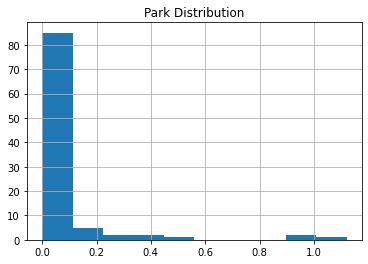

In [8]:
dataa1["Park"].hist()
plt.title("Park Distribution")

# Test of normality

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt str

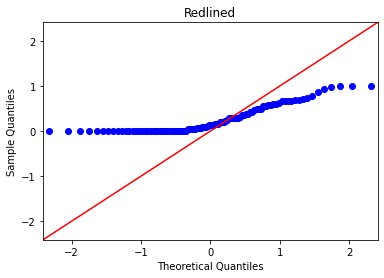

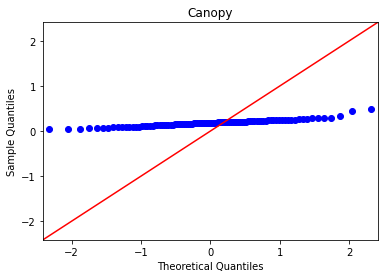

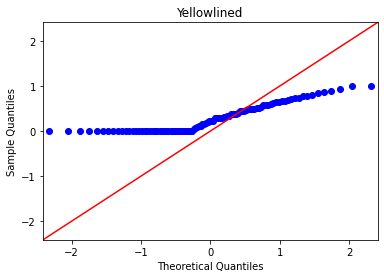

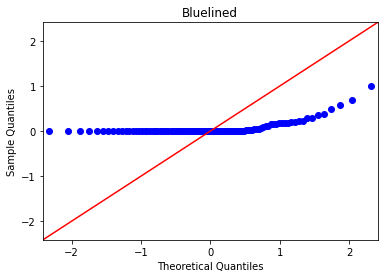

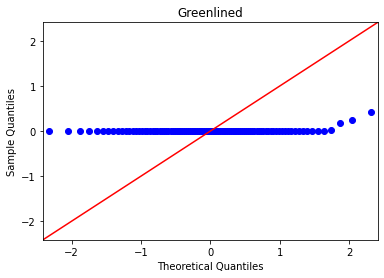

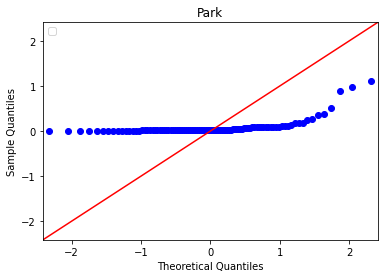

In [10]:
#The QQ plots

import statsmodels.api as sm
       

sm.qqplot(dataa["Redlined"],line='45')
plt.title("Redlined")
sm.qqplot(dataa["Canopy"],line='45')
plt.title("Canopy")
sm.qqplot(dataa[" Yellowlined"],line='45')
plt.title("Yellowlined")
sm.qqplot(dataa["Bluelined"],line='45')
plt.title("Bluelined")
sm.qqplot(dataa["Greenlined"],line='45')
plt.title("Greenlined")
sm.qqplot(dataa1["Park"],line='45')
plt.title("Park")

#plt.title("QQ plots")          
plt.legend()          


In [11]:
bounds= bounds.sort_values(by=["PRI_NEIGH"])

In [12]:
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 4, init='random', n_init=100)
 
#predict the labels of clusters.
label = kmeans.fit_predict(dataa)
 
print(label)

[2 2 1 0 0 2 2 3 2 2 3 2 0 2 0 0 2 3 2 0 1 0 2 1 0 2 3 0 0 2 3 2 1 1 0 2 1
 0 1 2 2 2 2 1 2 2 2 0 3 0 2 2 1 0 1 0 1 1 1 0 1 0 1 2 2 3 2 1 0 0 2 1 1 1
 1 2 2 0 3 0 0 1 2 1 2 0 2 1 0 2 2 1 1 3 0 0 2 2]


In [13]:
bounds['label']= label

In [14]:
bounds

,PRI_NEIGH,SEC_NEIGH,SHAPE_AREA,SHAPE_LEN,geometry,label
29,Albany Park,"NORTH PARK,ALBANY PARK",5.354223e+07,39339.016439,"POLYGON ((1155371.753 1933580.594, 1155375.020...",2
75,Andersonville,ANDERSONVILLE,9.584593e+06,12534.092625,"POLYGON ((1167028.260 1934671.927, 1166980.190...",2
77,Archer Heights,"ARCHER HEIGHTS,WEST ELSDON",5.592251e+07,31880.021030,"POLYGON ((1152950.120 1879807.143, 1152953.209...",1
8,Armour Square,"ARMOUR SQUARE,CHINATOWN",1.714147e+07,24359.189625,"POLYGON ((1176100.169 1887669.734, 1176102.380...",0
48,Ashburn,ASHBURN,1.354603e+08,54818.154632,"POLYGON ((1153627.375 1854775.750, 1153635.750...",0
...,...,...,...,...,...,...
32,West Ridge,WEST RIDGE,9.842909e+07,43020.689458,"POLYGON ((1160516.155 1950358.246, 1160520.420...",3
87,West Town,"WICKER PARK,WEST TOWN",5.850773e+07,46673.620546,"POLYGON ((1168380.941 1910805.861, 1168383.640...",0
88,Wicker Park,"WICKER PARK,WEST TOWN",2.685319e+07,21992.660946,"POLYGON ((1165393.205 1912064.277, 1165393.432...",0
18,Woodlawn,WOODLAWN,4.051574e+07,28960.059037,"POLYGON ((1188023.880 1860880.591, 1187930.820...",2


In [15]:



mapp={
    0 : "blue",
    1 : 'red',
    2 : 'pink',
    3 : 'yellow'
    
}

In [18]:
def plotter(data,col):

    
    fig, ax = plt.subplots(figsize=(14, 14))

    data.plot(column=col,
                categorical=True,
                legend=True,
                ax=ax)

    # Adjust legend location
    leg = ax.get_legend()
    leg.set_bbox_to_anchor((1.15,0.5))

    ax.set_axis_off()

    plt.show()
    
    

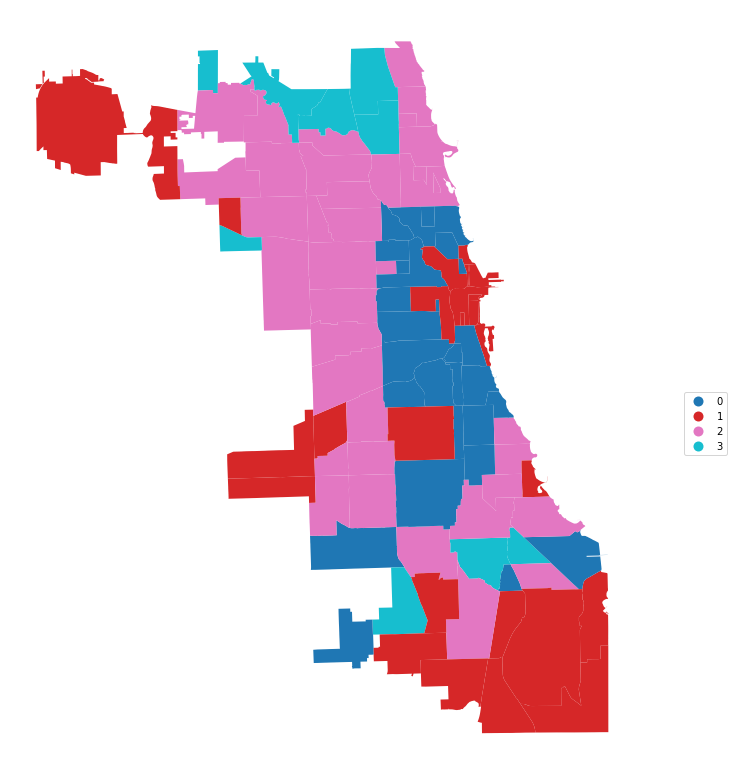

In [19]:
plotter(bounds,'label')

No handles with labels found to put in legend.


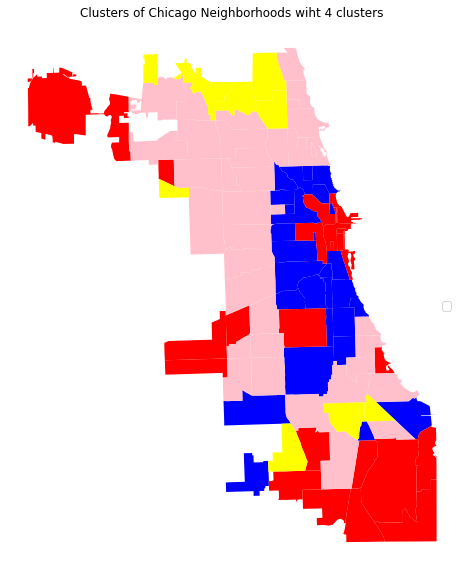

In [29]:
# Plot data
fig, ax = plt.subplots(figsize=(10, 10))

# Loop through each attribute type and plot it using the colors assigned in the dictionary
for ctype, data in  bounds.groupby('label'):
    
    # Define the color for each group using the dictionary
    color = mapp[ctype]
    
    # Plot each group using the color defined above
    data.plot(color=color,
              ax=ax,
              label=ctype)

ax.legend(bbox_to_anchor=(1.0, .5), prop={'size': 12})
ax.set(title='Clusters of Chicago Neighborhoods wiht 4 clusters')

ax.set_axis_off()
plt.show()


No handles with labels found to put in legend.


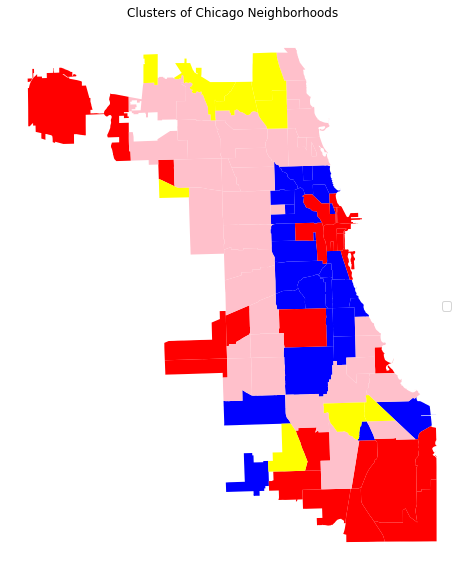

In [30]:
# Plot data
fig, ax = plt.subplots(figsize=(10, 10))

# Loop through each attribute type and plot it using the colors assigned in the dictionary
for ctype, data in  bounds.groupby('label'):
    
    # Define the color for each group using the dictionary
    color = mapp[ctype]
    
    # Plot each group using the color defined above
    data.plot(color=color,
              ax=ax,
              label=ctype)

ax.legend(bbox_to_anchor=(1.0, .5), prop={'size': 12})
ax.set(title='Clusters of Chicago Neighborhoods')

ax.set_axis_off()
plt.show()


The relationship with our cluster labels and 

In [31]:
suicide= pd.read_csv("/Users/amirreza/Desktop/suicide.csv")

In [32]:
cols2=["Community Area Name", "Cumulative Deaths 2006 - 2010"]
suicide1=suicide[cols2]



In [33]:

suicide1.columns=["PRI_NEIGH", "Cdeath"]
suicide1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   PRI_NEIGH  78 non-null     object
 1   Cdeath     78 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.3+ KB


In [34]:
bounds.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 98 entries, 29 to 74
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   PRI_NEIGH   98 non-null     object  
 1   SEC_NEIGH   98 non-null     object  
 2   SHAPE_AREA  98 non-null     float64 
 3   SHAPE_LEN   98 non-null     float64 
 4   geometry    98 non-null     geometry
 5   label       98 non-null     int32   
dtypes: float64(2), geometry(1), int32(1), object(2)
memory usage: 5.0+ KB


In [35]:
merger= pd.merge(bounds,suicide1, how="inner", on= "PRI_NEIGH")
merger

,PRI_NEIGH,SEC_NEIGH,SHAPE_AREA,SHAPE_LEN,geometry,label,Cdeath
0,Albany Park,"NORTH PARK,ALBANY PARK",5.354223e+07,39339.016439,"POLYGON ((1155371.753 1933580.594, 1155375.020...",2,18
1,Archer Heights,"ARCHER HEIGHTS,WEST ELSDON",5.592251e+07,31880.021030,"POLYGON ((1152950.120 1879807.143, 1152953.209...",1,2
2,Armour Square,"ARMOUR SQUARE,CHINATOWN",1.714147e+07,24359.189625,"POLYGON ((1176100.169 1887669.734, 1176102.380...",0,2
3,Ashburn,ASHBURN,1.354603e+08,54818.154632,"POLYGON ((1153627.375 1854775.750, 1153635.750...",0,4
4,Auburn Gresham,AUBURN GRESHAM,1.050654e+08,46757.721716,"POLYGON ((1173452.440 1854492.961, 1173453.375...",2,12
...,...,...,...,...,...,...,...
61,West Lawn,WEST LAWN,8.231530e+07,41934.490131,"POLYGON ((1153627.375 1854775.750, 1153562.625...",2,9
62,West Pullman,WEST PULLMAN,9.936520e+07,50023.843001,"POLYGON ((1179644.753 1819181.379, 1179643.622...",1,11
63,West Ridge,WEST RIDGE,9.842909e+07,43020.689458,"POLYGON ((1160516.155 1950358.246, 1160520.420...",3,22
64,West Town,"WICKER PARK,WEST TOWN",5.850773e+07,46673.620546,"POLYGON ((1168380.941 1910805.861, 1168383.640...",0,29


In [36]:
merger.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 66 entries, 0 to 65
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   PRI_NEIGH   66 non-null     object  
 1   SEC_NEIGH   66 non-null     object  
 2   SHAPE_AREA  66 non-null     float64 
 3   SHAPE_LEN   66 non-null     float64 
 4   geometry    66 non-null     geometry
 5   label       66 non-null     int32   
 6   Cdeath      66 non-null     int64   
dtypes: float64(2), geometry(1), int32(1), int64(1), object(2)
memory usage: 3.9+ KB


<AxesSubplot:>

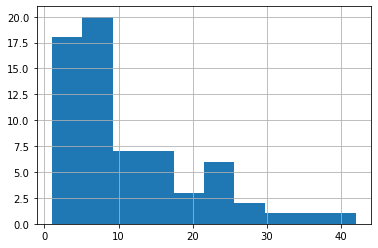

In [37]:
merger["Cdeath"].hist()

In [38]:
merger.describe()

,SHAPE_AREA,SHAPE_LEN,label,Cdeath
count,6.600000e+01,66.000000,66.000000,66.000000
mean,8.177182e+07,44013.475828,1.409091,11.393939
std,5.821001e+07,21126.626388,0.976292,8.966397
min,1.691396e+07,18137.944253,0.000000,1.000000
25%,4.857594e+07,31513.757573,1.000000,5.000000
50%,7.130457e+07,42621.643810,2.000000,9.000000
75%,9.836199e+07,48978.700705,2.000000,16.000000
max,3.718356e+08,173625.984660,3.000000,42.000000


In [39]:
merger.corr()

,SHAPE_AREA,SHAPE_LEN,label,Cdeath
SHAPE_AREA,1.000000,0.874226,-0.013251,0.077756
SHAPE_LEN,0.874226,1.000000,-0.042750,0.195459
label,-0.013251,-0.042750,1.000000,0.276562
Cdeath,0.077756,0.195459,0.276562,1.000000


In [40]:
#Cluster transformation for Cdeath
def transformer(x):
    c=-1
    
    if(x>18):
        c=3
    elif(x <= 18 and x>11 ):
        c=2
    elif(x>5 and x<=11):   
        c=1
    elif(x <= 5):
        c=0
        
    return  c       
        

In [41]:
#transforming the commulative deaths into clusters

for i in range(len(merger)):
    print(merger["Cdeath"][i])
    merger["Cdeath"][i]=transformer(merger["Cdeath"][i])
    print(transformer(merger["Cdeath"][i]))

18
0
2
0
2
0
4
0
12
0
23
0
1
0
17
0
13
0
7
0
15
0
17
0
1
0
2
0
12
0
11
0
8
0
4
0
22
0
6
0
32
0
7
0
7
0
1
0
9
0
20
0
7
0
2
0
3
0
6
0
22
0
15
0
5
0
42
0
19
0
13
0
16
0
13
0
9
0
4
0
6
0
9
0
6
0
16
0
8
0
2
0
23
0
8
0
1
0
36
0
3
0
3
0
22
0
9
0
7
0
8
0
14
0
26
0
5
0
5
0
9
0
9
0
11
0
22
0
29
0
6
0


/var/folders/sw/_yt0tfzj6wb08zxvbrdj6lcr0000gn/T/ipykernel_19701/912791220.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merger["Cdeath"][i]=transformer(merger["Cdeath"][i])


In [42]:
merger["Cdeath"].value_counts()

1    22
0    18
2    13
3    13
Name: Cdeath, dtype: int64

In [43]:
merger.corr()

,SHAPE_AREA,SHAPE_LEN,label,Cdeath
SHAPE_AREA,1.000000,0.874226,-0.013251,0.121396
SHAPE_LEN,0.874226,1.000000,-0.042750,0.218034
label,-0.013251,-0.042750,1.000000,0.311349
Cdeath,0.121396,0.218034,0.311349,1.000000


<AxesSubplot:>

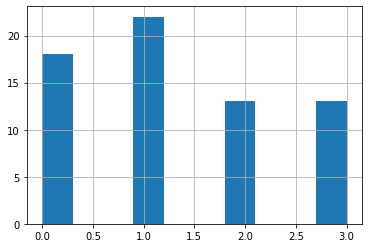

In [44]:
merger["Cdeath"].hist()

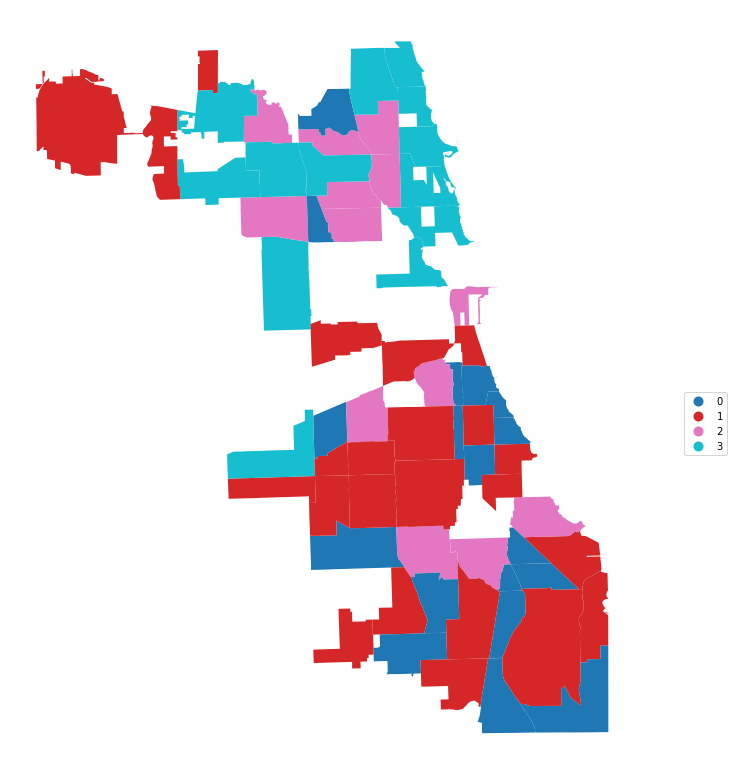

In [45]:
#plotting the clusters of Cdeath in the map of Chicago

mapp={

    0 : "red",
    1 : 'blue',
    2 : 'purple',
    3 : 'yellow'
    
}




fig, ax = plt.subplots(figsize=(14, 14))

merger.plot(column='Cdeath',
                categorical=True,
                legend=True,
                ax=ax)

# Adjust legend location
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.15,0.5))

ax.set_axis_off()

plt.show()

# Cluster Anlaysis of the result of KMeans

In [46]:



n1=dataa[label==0]
n2=dataa[label==1]
n3=dataa[label==2]
n4=dataa[label==3]

In [47]:
n1.describe()

,Redlined,Yellowlined,Bluelined,Greenlined,Canopy
count,27.000000,27.000000,27.000000,27.000000,27.000000
mean,0.682963,0.031111,0.001111,0.000370,0.146252
std,0.177630,0.082943,0.005774,0.001925,0.052646
min,0.420000,0.000000,0.000000,0.000000,0.069200
25%,0.570000,0.000000,0.000000,0.000000,0.095900
50%,0.660000,0.000000,0.000000,0.000000,0.143000
75%,0.750000,0.000000,0.000000,0.000000,0.187850
max,1.000000,0.340000,0.030000,0.010000,0.244800


In [48]:
n2.describe()

,Redlined,Yellowlined,Bluelined,Greenlined,Canopy
count,25.000000,25.000000,25.000000,25.00,25.000000
mean,0.121200,0.102400,0.023600,0.01,0.166512
std,0.128592,0.125575,0.056854,0.05,0.081367
min,0.000000,0.000000,0.000000,0.00,0.035900
25%,0.000000,0.000000,0.000000,0.00,0.091500
50%,0.090000,0.000000,0.000000,0.00,0.160200
75%,0.230000,0.220000,0.000000,0.00,0.225800
max,0.370000,0.310000,0.170000,0.25,0.298000


In [49]:
n3.describe()


,Redlined,Yellowlined,Bluelined,Greenlined,Canopy
count,37.000000,37.000000,37.000000,37.000000,37.000000
mean,0.097568,0.628378,0.050811,0.000811,0.191378
std,0.135306,0.176958,0.079735,0.004932,0.038726
min,0.000000,0.380000,0.000000,0.000000,0.107200
25%,0.000000,0.490000,0.000000,0.000000,0.169000
50%,0.010000,0.610000,0.000000,0.000000,0.191200
75%,0.150000,0.740000,0.060000,0.000000,0.213600
max,0.480000,1.000000,0.290000,0.030000,0.258900


In [50]:
n4.describe()

,Redlined,Yellowlined,Bluelined,Greenlined,Canopy
count,9.000000,9.000000,9.000000,9.000000,9.000000
mean,0.011111,0.168889,0.467778,0.065556,0.302511
std,0.022608,0.156560,0.258349,0.144318,0.101983
min,0.000000,0.000000,0.200000,0.000000,0.203900
25%,0.000000,0.050000,0.290000,0.000000,0.225200
50%,0.000000,0.080000,0.370000,0.000000,0.278100
75%,0.000000,0.320000,0.590000,0.000000,0.343800
max,0.060000,0.370000,1.000000,0.420000,0.487800


In [51]:
canopy=[0.166512,0.146252,0.302511,0.191378]
redline=[0.121200,0.682963,0.011111,0.097568]
yellowline=[0.102400,0.031111,0.168889,0.628378]
greenline=[0.01,0.000370,0.065556,0.000811]
blueline=[0.023600,0.001111,0.467778,0.050811]

In [52]:
dat={"canopy": canopy,
    "greenline" : greenline,
    "yellowline" : yellowline,
    "redline" : redline,
    "blueline": blueline}
info=pd.DataFrame(data=dat)
info.columns

Index(['canopy', 'greenline', 'yellowline', 'redline', 'blueline'], dtype='object')

No handles with labels found to put in legend.


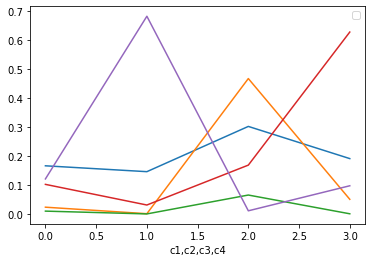

In [53]:
plt.plot(info["canopy"])
plt.plot(info["blueline"])
plt.plot(info["greenline"])
plt.plot(info["yellowline"])
plt.plot(info["redline"])
plt.xlabel("c1,c2,c3,c4")

plt.legend()


# Machine Learning: Trying to see the prediction power of our clusters


In [54]:
merger1= pd.merge(dataa1,suicide1, how="inner", on= "PRI_NEIGH")
merger1

,PRI_NEIGH,Redlined,Yellowlined,Bluelined,Greenlined,Canopy,Park,Cdeath
0,Albany Park,0.00,0.81,0.12,0.00,0.2413,0.02,18
1,Archer Heights,0.10,0.28,0.00,0.00,0.0760,0.02,2
2,Armour Square,0.68,0.00,0.00,0.00,0.0872,0.03,2
3,Ashburn,0.58,0.00,0.00,0.01,0.1633,0.02,4
4,Auburn Gresham,0.21,0.44,0.15,0.00,0.1874,0.03,12
...,...,...,...,...,...,...,...,...
61,West Lawn,0.04,0.40,0.00,0.00,0.1072,0.02,9
62,West Pullman,0.28,0.22,0.00,0.00,0.2735,0.03,11
63,West Ridge,0.00,0.08,0.69,0.00,0.2519,0.09,22
64,West Town,0.49,0.00,0.00,0.00,0.0827,0.02,29


In [55]:
predictors=["Redlined",' Yellowlined','Bluelined','Greenlined','Canopy']
x=merger1[predictors]
y=merger1["Cdeath"]

In [56]:
len(y)

66

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


[ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 21 22 24 25 26
 27 28 29 30 31 32 33 34 36 37 38 39 40 41 42 43 45 46 48 49 50 51 52 53
 54 56 57 58 59 60 61 62 63 64 65]
[ 4 20 23 35 44 47 55]
Mean squared error: 32.24
[ 0  1  2  4  5  6  7  8  9 10 11 13 14 16 17 18 19 20 22 23 24 25 26 27
 28 29 30 31 32 33 34 35 36 37 38 39 40 42 43 44 45 47 48 49 50 51 52 53
 54 55 56 57 58 59 61 62 63 64 65]
[ 3 12 15 21 41 46 60]
Mean squared error: 34.08
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 40 41 42 43 44 45 46 47 49 50 51
 52 53 54 55 56 60 61 62 63 64 65]
[16 17 39 48 57 58 59]
Mean squared error: 35.00
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 15 16 17 20 21 22 23 24 25 26
 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 43 44 45 46 47 48 49 50 52
 53 55 56 57 58 59 60 61 62 64 65]
[14 18 19 42 51 54 63]
Mean squared error: 49.37
[ 0  1  3  4  5  6  7  9 10 11 12 14 15 16 17 18 19 20 21 22 23 24 25 26
 29 30 

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


Mean squared error: 50.17
[ 0  1  2  3  4  5  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 38 39 40 41 42 43 44 46 47 48 49 50 51
 52 53 54 55 57 58 59 60 61 62 63 64]
[ 6  7 37 45 56 65]
Mean squared error: 40.37
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 35 36 37 38 39 40 41 42 43 44 45 46 47 48 50 51 52
 54 55 56 57 58 59 60 61 62 63 64 65]
[ 0 32 33 34 49 53]
Mean squared error: 200.73
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 25 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 44 45 46 47 48 49 50
 51 52 53 54 55 56 57 58 59 60 63 65]
[24 26 43 61 62 64]
Mean squared error: 122.48


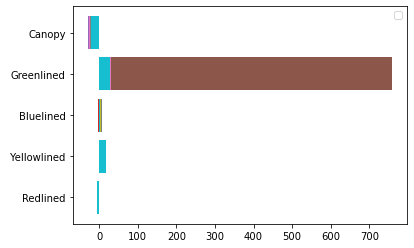

In [57]:
#running a simple regression

from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score



kf = KFold(n_splits=10,shuffle=True)


for train_index, test_index in kf.split(x):
    print(train_index)
    print(test_index)
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    res = linear_model.LinearRegression()
    res.fit(x_train,y_train)
    pred= res.predict(x_test)
    plt.figaspect
    plt.barh(predictors, res.coef_)
    plt.legend()
    print("Mean squared error: %.2f" % mean_squared_error(y_test, pred))
    #plt.scatter(y_test, pred, color="black")
    #plt.plot(y_test, pred, color="blue", linewidth=3)




In [58]:
res.coef_

array([ -5.03857297,  18.80070404,   3.01601363,  27.68373217,
       -22.40676403])

In [59]:
res.score(x,y)

0.31073370055855454

In [60]:
res = linear_model.LinearRegression()
res.fit(x,y)

LinearRegression()

<BarContainer object of 5 artists>

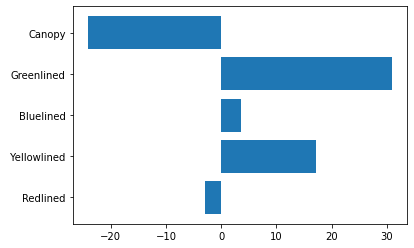

In [61]:
plt.barh(predictors, res.coef_)


In [62]:
#now lets do random forest regressor

from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(n_estimators=100, random_state=0)

for train_index, test_index in kf.split(x):
    #print(train_index)
    #print(test_index)
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    regr.fit(x_train,y_train)
    pred= regr.predict(x_test)
    regr.feature_importances_
    print("Mean squared error: %.2f" % mean_squared_error(y_test, pred))
    #regr.get_params(10)
    regr.feature_importances_
    #plt.scatter(y_test, pred, color="black")
    #plt.plot(y_test, pred, color="blue", linewidth=3)


Mean squared error: 17.71
Mean squared error: 130.57
Mean squared error: 25.79
Mean squared error: 44.46
Mean squared error: 74.98
Mean squared error: 80.43
Mean squared error: 51.53
Mean squared error: 59.48
Mean squared error: 84.94
Mean squared error: 95.61


In [48]:
regr = RandomForestRegressor(n_estimators=100, random_state=0)
regr.fit(x,y)



RandomForestRegressor(random_state=0)

In [49]:
regr.feature_importances_


array([0.12919495, 0.55026457, 0.05577574, 0.02264773, 0.242117  ])

<BarContainer object of 5 artists>

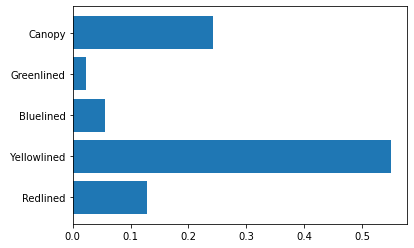

In [50]:
plt.barh(predictors, regr.feature_importances_)


The updated dataset

In [65]:
os.chdir("/Users/amirreza/Desktop")

dfnew= pd.read_csv("dataU.csv")

In [66]:
dfnew

,Neighborhood,Total Area,Average Housing Cost\nMedian Sales Price 2021,Housing Energy Usage\nElectricity Usage KWH/SQFT,% Owner Occupied,% Single Family,Sales per 100 residential parcels (AVG 2005-2021),% Cost Burdened (owner + renter)
0,Albany Park,4.974188e+06,"$495,000",16294.87083,40.3,19.2,5.5,39.3
1,Andersonville,8.904190e+05,NaN,NaN,NaN,NaN,NaN,NaN
2,Archer Heights,5.195324e+06,NaN,20489.03412,62.8,42.9,3.9,37.8
3,Armour Square,1.592448e+06,NaN,25015.03285,34.4,15.8,3.2,40.9
4,Ashburn,1.258451e+07,NaN,20145.45023,83.7,86.8,4.2,33.8
...,...,...,...,...,...,...,...,...
93,West Ridge,9.144224e+06,NaN,22241.92994,47.6,21.5,5.2,45.3
94,West Town,5.435425e+06,"$737,500",17202.36061,40.0,8.6,8.0,29.1
95,Wicker Park,2.494697e+06,NaN,NaN,NaN,NaN,NaN,NaN
96,Woodlawn,3.763895e+06,NaN,19620.78157,24.1,7.0,7.0,56.9


In [74]:
dfnew=dfnew.rename(columns={"Neighborhood": "PRI_NEIGH"})

merger2= pd.merge(dataa1,dfnew, how="inner", on= "PRI_NEIGH")


#merger3= pd.merge(merger2,suicide, how='inner', on= "PRI_NEIGH")

In [75]:
merger2.corr()

,Redlined,Yellowlined,Bluelined,Greenlined,Canopy,Park,Total Area,Housing Energy Usage\nElectricity Usage KWH/SQFT,% Owner Occupied,% Single Family,Sales per 100 residential parcels (AVG 2005-2021),% Cost Burdened (owner + renter)
Redlined,1.000000,-0.496569,-0.315496,-0.126598,-0.306989,-0.142447,-0.231429,0.017644,-0.324240,-0.250582,0.207986,0.218954
Yellowlined,-0.496569,1.000000,-0.030446,-0.053276,0.201914,-0.207719,0.047400,-0.179671,-0.050598,-0.214233,0.264696,0.104853
Bluelined,-0.315496,-0.030446,1.000000,0.145334,0.408606,-0.083365,-0.002572,-0.081215,0.214202,0.148425,-0.128434,-0.136826
Greenlined,-0.126598,-0.053276,0.145334,1.000000,0.449992,-0.034924,0.000682,-0.024192,0.316428,0.252765,-0.136541,-0.287016
Canopy,-0.306989,0.201914,0.408606,0.449992,1.000000,0.097040,0.073067,-0.282336,0.242909,0.277190,-0.060169,-0.186213
Park,-0.142447,-0.207719,-0.083365,-0.034924,0.097040,1.000000,-0.183748,0.046308,-0.407264,-0.391321,0.290136,0.236491
Total Area,-0.231429,0.047400,-0.002572,0.000682,0.073067,-0.183748,1.000000,-0.093529,0.084601,0.182520,-0.223136,0.048562
Housing Energy Usage\nElectricity Usage KWH/SQFT,0.017644,-0.179671,-0.081215,-0.024192,-0.282336,0.046308,-0.093529,1.000000,-0.101065,-0.211351,0.064069,-0.108078
% Owner Occupied,-0.324240,-0.050598,0.214202,0.316428,0.242909,-0.407264,0.084601,-0.101065,1.000000,0.765527,-0.479531,-0.677080
% Single Family,-0.250582,-0.214233,0.148425,0.252765,0.277190,-0.391321,0.182520,-0.211351,0.765527,1.000000,-0.638888,-0.387506


In [78]:
merger3= pd.merge(merger2, suicide1, how='inner', on= "PRI_NEIGH")

In [79]:
merger3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66 entries, 0 to 65
Data columns (total 15 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   PRI_NEIGH                                          66 non-null     object 
 1   Redlined                                           66 non-null     float64
 2    Yellowlined                                       66 non-null     float64
 3   Bluelined                                          66 non-null     float64
 4   Greenlined                                         66 non-null     float64
 5   Canopy                                             66 non-null     float64
 6   Park                                               66 non-null     float64
 7   Total Area                                         66 non-null     float64
 8   Average Housing Cost
Median Sales Price 2021       27 non-null     object 
 9   Housing Ener

Tasks:
1-Merging in a way to lose the minimum data
2-plot the quantiles maybe???
3-Trying to do prediction for each of the new features using the previous ones
4-maybe do the clustering again to see the difference

In [81]:
merger3.describe()

,Redlined,Yellowlined,Bluelined,Greenlined,Canopy,Park,Total Area,Housing Energy Usage\nElectricity Usage KWH/SQFT,% Owner Occupied,% Single Family,Sales per 100 residential parcels (AVG 2005-2021),% Cost Burdened (owner + renter),Cdeath
count,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,6.600000e+01,6.500000e+01,66.000000,66.000000,66.000000,66.000000,66.000000
mean,0.217424,0.321818,0.087273,0.003182,0.186042,0.063485,7.606640e+06,4.554900e+04,48.190909,36.993939,4.984848,41.187879,11.393939
std,0.248907,0.288470,0.179757,0.021207,0.068721,0.077011,5.400650e+06,1.462592e+05,19.344574,27.733739,1.287244,9.373391,8.966397
min,0.000000,0.000000,0.000000,0.000000,0.035900,0.000000,1.571300e+06,1.008114e+04,7.100000,0.000000,3.100000,19.400000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.147600,0.020000,4.512689e+06,1.538694e+04,35.975000,12.250000,4.000000,34.275000,5.000000
50%,0.110000,0.295000,0.000000,0.000000,0.188950,0.030000,6.624313e+06,1.782347e+04,45.850000,29.000000,4.700000,40.850000,9.000000
75%,0.405000,0.570000,0.117500,0.000000,0.218675,0.090000,9.137836e+06,2.392727e+04,64.075000,65.200000,5.675000,47.475000,16.000000
max,0.860000,0.880000,1.000000,0.170000,0.441500,0.370000,3.437963e+07,1.154623e+06,85.800000,86.800000,8.000000,62.200000,42.000000


In [82]:
merger3.drop("Average Housing Cost\nMedian Sales Price 2021",axis=1,inplace=True)

In [110]:
predictors=["Redlined",' Yellowlined','Bluelined','Greenlined','Canopy']
x=merger3[predictors]
y=merger3["Sales per 100 residential parcels (AVG 2005-2021)"]

In [111]:
def lineartest(x,y):    
    import statsmodels.api as sm

    #add constant to predictor variables
    x = sm.add_constant(x)

    #fit linear regression model
    model = sm.OLS(y, x).fit()

    #view model summary
    print(model.summary())



                                            OLS Regression Results                                           
Dep. Variable:     Sales per 100 residential parcels (AVG 2005-2021)   R-squared:                       0.230
Model:                                                           OLS   Adj. R-squared:                  0.165
Method:                                                Least Squares   F-statistic:                     3.576
Date:                                               Thu, 04 Aug 2022   Prob (F-statistic):            0.00677
Time:                                                       21:04:30   Log-Likelihood:                -101.20
No. Observations:                                                 66   AIC:                             214.4
Df Residuals:                                                     60   BIC:                             227.5
Df Model:                                                          5                                         
Covariance

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


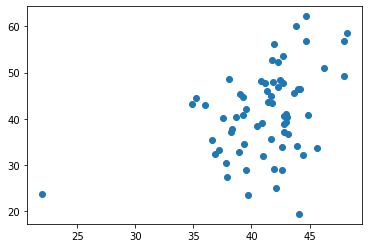

In [97]:
plt.scatter(pred,y)
